# ERA5 plots and animatinos

In [1]:
import xarray as xr
from sithom.plot_utils import plot_defaults
from src.constants import KATRINA_ERA5_NC

ModuleNotFoundError: No module named 'sithom'

In [2]:
ds = xr.open_dataset(KATRINA_ERA5_NC)

ds.swh.sel(time="2005-08-2T01:00:00").plot()
ds.tp.sel(time="2005-08-2T01:00:00").plot()

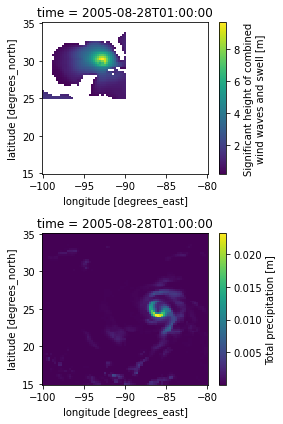

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(4,6))
ds.swh.sel(time="2005-08-28T01:00:00").plot(ax=axs[0])
ds.tp.sel(time="2005-08-28T01:00:00").plot(ax=axs[1])
plt.tight_layout()

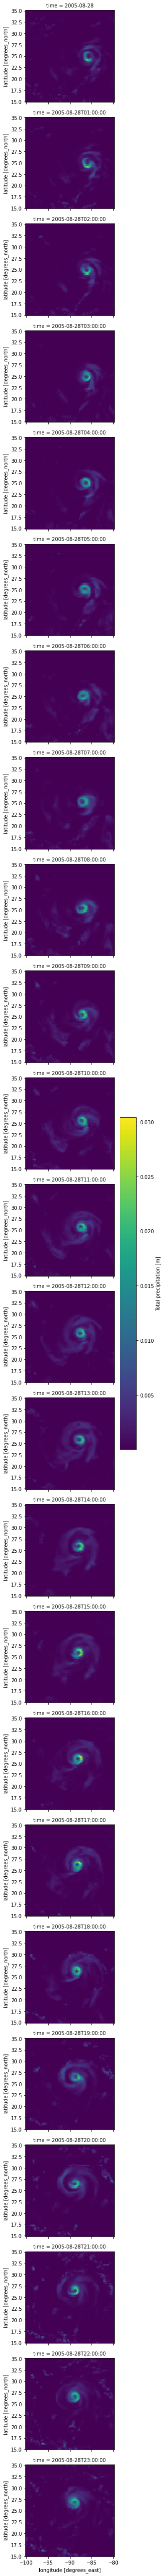

In [5]:
ds.tp.sel(time="2005-08-28").plot(row="time")

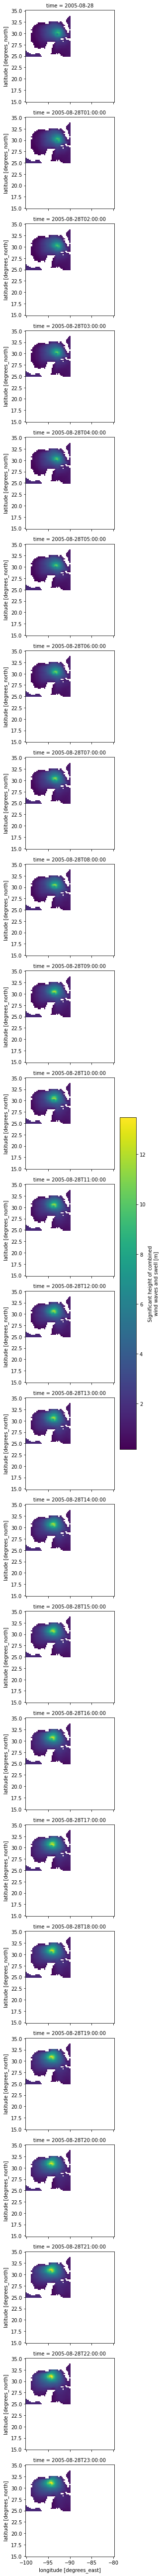

In [7]:
ds.swh.sel(time="2005-08-2").plot(row="time")

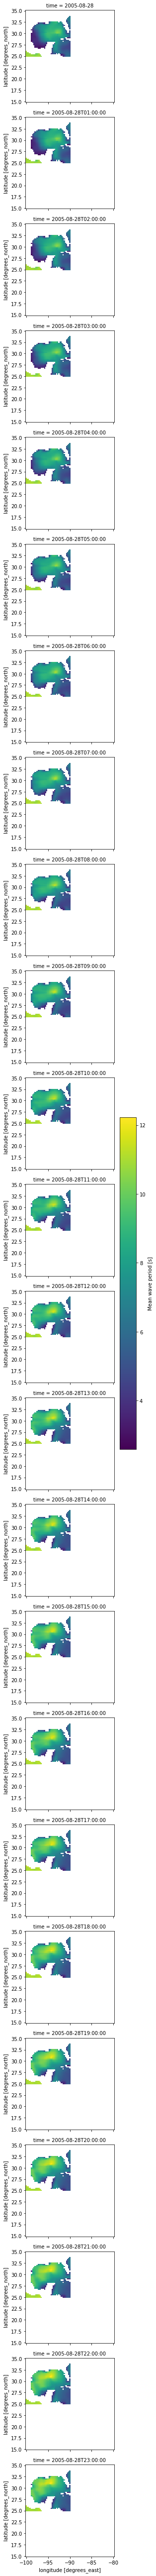

In [10]:
ds.mwp.sel(time="2005-08-28").plot(row="time")